# Exercise 06 - In-class tasks

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("train_tau3mu.csv")

## a) Inspecting the dataset

In [3]:
df

,LifeTime,dira,FlightDistance,FlightDistanceError,IP,IPSig,VertexChi2,pt,DOCAone,DOCAtwo,...,p1_pt,p2_pt,p0_p,p1_p,p2_p,p0_eta,p1_eta,p2_eta,SPDhits,signal
0,0.001578,0.999999,14.033335,0.681401,0.016039,0.451886,1.900433,1482.037476,0.066667,0.060602,...,448.369446,1393.246826,3842.096436,12290.760742,39264.398438,3.076006,4.003800,4.031514,458,0
1,0.000988,0.999705,5.536157,0.302341,0.142163,9.564503,0.865666,3050.720703,0.024022,0.019245,...,2033.918701,747.137024,8299.368164,16562.667969,7341.257812,3.228553,2.786543,2.975564,406,0
2,0.000877,0.999984,6.117302,0.276463,0.034746,1.970751,10.975849,3895.908691,0.055044,0.047947,...,2576.380615,963.652466,11323.134766,22695.388672,10225.309570,3.536903,2.865686,3.052810,196,0
3,0.000854,0.999903,5.228067,0.220739,0.076389,4.271331,3.276358,4010.781738,0.053779,0.006417,...,1351.734131,1685.003662,11502.081055,16909.515625,9141.426758,3.087461,3.218034,2.375592,137,0
4,0.001129,0.999995,39.069534,1.898197,0.120936,4.984982,0.468348,4144.546875,0.004491,0.037326,...,1755.792236,1282.428711,74117.117188,97612.804688,47118.785156,4.632295,4.711155,4.296878,477,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67548,0.002119,0.999994,13.959758,0.218555,0.048056,4.228432,2.259959,4448.312500,0.050823,0.018611,...,2983.029541,1216.187988,6324.526855,21479.021484,11186.428711,3.243758,2.662427,2.909159,236,1
67549,0.002150,0.999994,17.951668,0.362415,0.059266,4.356027,1.288439,4094.758545,0.027567,0.000755,...,2798.172363,628.293091,8949.816406,33156.484375,7878.073730,2.891281,3.163634,3.220385,461,1
67550,0.000969,0.999954,5.089369,0.250686,0.051560,2.790214,1.725869,2481.475830,0.057835,0.013549,...,915.056702,1358.508545,8346.537109,11928.290039,10929.805664,3.189317,3.259355,2.774369,125,1
67551,0.001296,0.999996,18.405382,0.580693,0.051905,3.617818,0.454716,3977.924561,0.035837,0.012449,...,2065.975342,1719.885864,13744.966797,46318.148438,24221.369141,4.326723,3.802581,3.336862,88,1


In [4]:
df.info()
print(df['signal'].sum())  # more signal!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67553 entries, 0 to 67552
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   LifeTime             67553 non-null  float64
 1   dira                 67553 non-null  float64
 2   FlightDistance       67553 non-null  float64
 3   FlightDistanceError  67553 non-null  float64
 4   IP                   67553 non-null  float64
 5   IPSig                67553 non-null  float64
 6   VertexChi2           67553 non-null  float64
 7   pt                   67553 non-null  float64
 8   DOCAone              67553 non-null  float64
 9   DOCAtwo              67553 non-null  float64
 10  DOCAthree            67553 non-null  float64
 11  IP_p0p2              67553 non-null  float64
 12  IP_p1p2              67553 non-null  float64
 13  isolationa           67553 non-null  int64  
 14  isolationb           67553 non-null  int64  
 15  isolationc           67553 non-null 

In [5]:
from sklearn.preprocessing import StandardScaler

X = df.drop("signal", axis=1)
X_scaled = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

Y = df["signal"]

## b) Checking data saturation

In [6]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_scaled.to_numpy(), Y.to_numpy(), train_size = 0.5)

In [7]:
# this function calculates a simple score to evaluate the performance of your neural network
def SimpleScore(model, xtest, ytest):
    pred = model.predict(xtest)

    if (pred.shape != ytest.shape): # important! prevents broadcasting
        pred=pred.reshape(ytest.shape) 

    diff = np.abs(pred - np.clip(ytest,0,1))
    
    return np.mean(np.less(diff,0.5))  

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

X= np.linspace(1000, Xtrain.shape[0], 5, dtype= int)
bdt_list = []
for i in X:
    gb= GradientBoostingClassifier(n_estimators= 200, learning_rate= 0.1, max_depth=3)
    gb.fit(Xtrain[:i, :], Ytrain[:i])
    score = SimpleScore(gb, Xtest, Ytest)
    bdt_list.append([i, score])
print(bdt_list)


[[1000, 0.8520294875210942], [9194, 0.8763359682624271], [17388, 0.8807176481037392], [25582, 0.8811913432217189], [33776, 0.8808952837729817]]


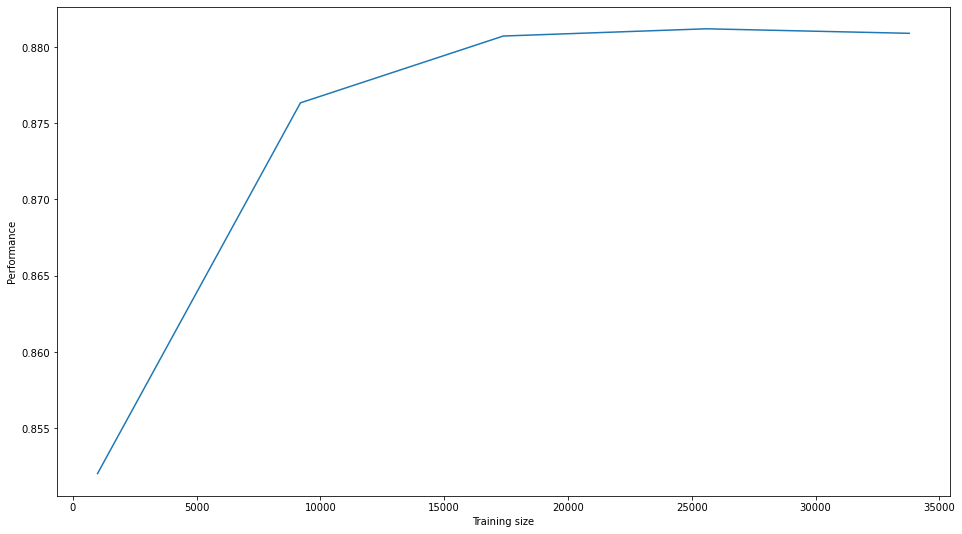

In [9]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(16,9))
A= np.array(bdt_list)
plt.plot(A[:, 0], A[:, 1])
plt.xlabel("Training size")
plt.ylabel("Performance")
plt.show()

## c) Expand the function plotFeature

In [19]:
import matplotlib.pyplot as plt
def plotFeature(X, Y, feature, sample_size, bins=150):    
    bg = X[feature][Y==0][:sample_size].tonumpy()
    sg = X[feature][Y==1][:sample_size].tonumpy()

    plt.figure(0, figsize=(8,8))
    plt.hist(bg, label= "Background")
    plt.hist(sg, label="Signal")
    plt.title("Feature: "+feature)
    plt.legend()
    plt.show()

## d) Comparison with the Kolmogorov–Smirnov test

In [9]:
from scipy.stats import ks_2samp


## e) Test with simple neural network

In [10]:
cols = list(X.columns)

In [11]:
import tensorflow.keras
from tensorflow.keras import Sequential as Sequential
import tensorflow.keras.layers as layers
from tensorflow.keras.callbacks import EarlyStopping

# model simple neural network

print("score",SimpleScore(model,Xtest,Ytest))